## ResNet Varients + Fine-Tuning


In [22]:

from keras.models import Model , Sequential
from keras.layers import *

import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications import ResNet50



In [23]:
train_path = 'train'
text_path = 'test'

In [24]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [25]:
train_batch = datagen.flow_from_directory(train_path,class_mode='categorical',color_mode='rgb',batch_size=8,target_size=(32,32),shuffle=True,seed=42)

Found 989 images belonging to 10 classes.


In [26]:
test_batch = datagen.flow_from_directory(text_path,class_mode='categorical',color_mode='rgb',batch_size=8,target_size=(32,32),shuffle=False,seed=42)

Found 140 images belonging to 10 classes.


### Model Initialization


In [15]:
base_model = ResNet50(include_top=False,
                      weights=None,
                      input_tensor=None,
                      input_shape=(32,32,3),
                      pooling=None,
                      classes=10,
                      classifier_activation='softmax'
                      )

x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(10,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

### Compile Model


In [30]:
adam_opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=adam_opt,
              loss=['categorical_crossentropy'],
              metrics=['accuracy']
              )

### callbacks


In [32]:
callbacks = [
    ModelCheckpoint('Best_ResNet50.keras', monitor='accuracy', save_best_only=True, mode='max')
]

# Run model


In [33]:
history = model.fit(train_batch,
                    epochs=1,
                    verbose=1,
                    callbacks=callbacks
                    )

c:\Users\Ripon\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


124/124 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.1143 - loss: 4.8334


## stats


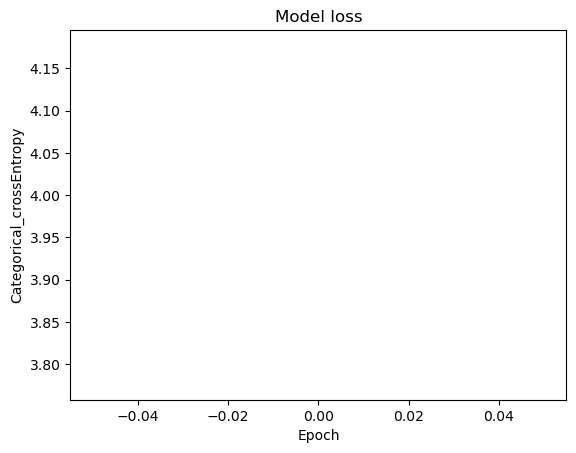

In [34]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Categorical_crossEntropy')
plt.xlabel('Epoch')
plt.show()

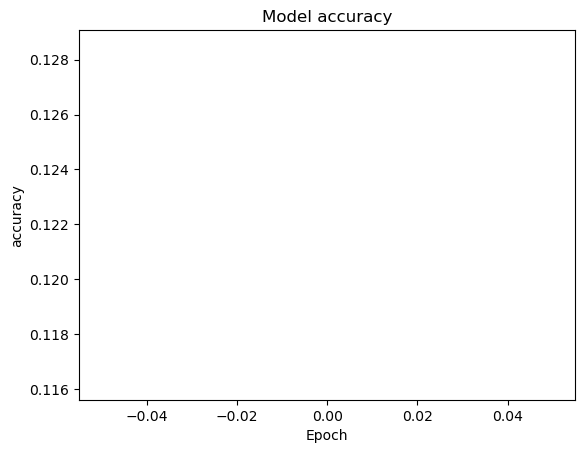

In [35]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

## Test


In [36]:
filenames= test_batch.filenames
nb_samples = len(filenames)

loss ,acc = model.evaluate(test_batch,steps=nb_samples)
print("Loss",loss)
print("Acc",acc)

c:\Users\Ripon\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


140/140 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.1138 - loss: 2.4437 
Loss 2.447983980178833
Acc 0.11428571492433548


c:\Users\Ripon\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


## Fine Tuning


### Model initalization


In [ ]:
base_model = ResNet50(include_top=False,
                      weights='inagenet',
                      input_tensor=None,
                      input_shape=(32,32,3),
                      pooling=None,
                      classes=10,
                      classifier_activation='softmax'
                      )

x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(10,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=output)
model.summary()

# Batch Normalization Layer


## compile


## Run model


## Stats


## Test
